In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

## Local  rice field data

The multiple temporal reflectances were downloaded from December 2018 to July 2019; this time was selected due to the disponibility of surface reflectance images in the GEE platform: https://code.earthengine.google.com/62efb50cb207255018846f1bbf56ed62. The spectral data was stored as a csv file format.

In [6]:
### read multispectral data

data_faridpur = pd.read_csv("data/faridpur_bands.csv")
data_faridpur.date = pd.to_datetime(data_faridpur.date, format='%m/%d/%Y')

data_faridpur.head()

,filename,id2,date,NDVI,blue,green,narrow_nir,nir,rdg_1,rdg_2,rdg_3,red,swir1,swir2
0,2_20181223T043201_20181223T043736_T45QZG_00000...,md_acchu_sheik_dha33,2018-12-23,0.426925,775.947020,991.490066,2118.476821,2227.947020,1260.470199,1905.682119,2055.470199,894.589404,2010.708609,1425.887417
1,2_20181223T043201_20181223T043736_T46QBM_00000...,md_acchu_sheik_dha33,2018-12-23,0.416989,803.356164,1011.013699,2166.856164,2198.020548,1318.849315,1969.808219,2111.123288,904.239726,2072.020548,1505.020548
2,2_20181228T043209_20181228T043927_T46QBM_00000...,md_acchu_sheik_dha33,2018-12-28,0.409055,945.575343,1078.328767,2342.232877,2305.472603,1345.513699,2017.630137,2201.212329,966.383562,2189.979452,1752.479452
3,2_20181228T043209_20181228T043927_T45QZG_00000...,md_acchu_sheik_dha33,2018-12-28,0.407610,949.304636,1088.463576,2244.337748,2306.218543,1315.496689,1953.933775,2129.794702,970.278146,2097.589404,1652.728477
4,2_20190102T043151_20190102T043514_T45QZG_00000...,md_acchu_sheik_dha33,2019-01-02,0.578985,476.456954,841.033113,2620.000000,2658.490066,1262.688742,2288.291391,2542.443709,710.993378,2300.052980,1642.284768


### Time profile plots

Text(0,0.5,'NDVI')

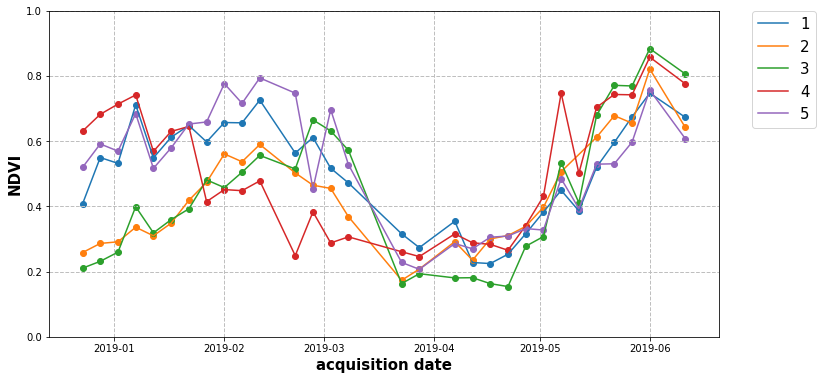

In [9]:
fig, ax = plt.subplots(figsize=[12,6])
labelsplot = []

axes = plt.gca()
axes.set_ylim([0,1])
for j, i in enumerate(np.unique(data_faridpur.id2)):
    if np.logical_not('shei' in i):
        data_sub = data_faridpur.loc[data_faridpur.id2 == i]

        ax.plot(data_sub.date,data_sub.NDVI.values)
        ax.scatter(data_sub.date,data_sub.NDVI.values )
        ax.grid(True, lw=1, ls='--', c='.75')
        labelsplot.append(str(j-1))
    
ax.legend(tuple(labelsplot), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
ax.set_xlabel("acquisition date", fontsize=15, fontweight='bold')
ax.set_ylabel("NDVI", fontsize=15, fontweight='bold')

C:\Users\JANUS\AppData\Local\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Text(0,0.5,'NDVI')

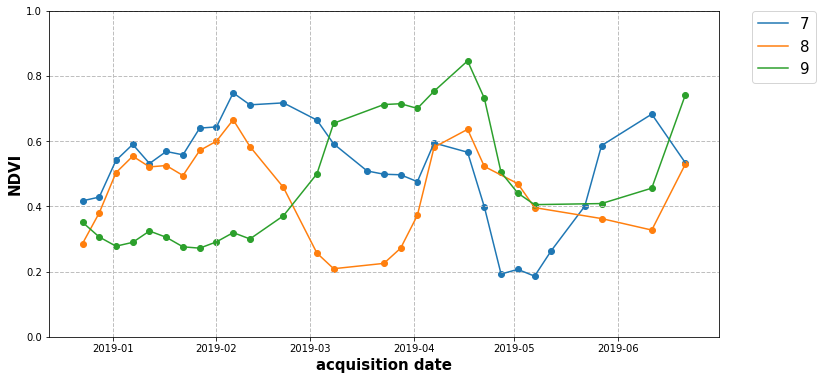

In [14]:
from scipy.signal import savgol_filter
fig, ax = plt.subplots(figsize=[12,6])
labelsplot = []
axes = plt.gca()
axes.set_ylim([0,1])
count = 0
for i in np.unique(data_faridpur.id2):
    if 'shei' in i:
        count +=1
        data_sub = data_faridpur.loc[data_faridpur.id2 == i]
        data_sub = data_sub.groupby(['date']).mean()
        ndvi_smoothed = savgol_filter(data_sub.NDVI.values, 5, 3)
        ax.plot(data_sub.index.values,ndvi_smoothed)
        ax.scatter(data_sub.index.values,ndvi_smoothed )
        ax.grid(True, lw=1, ls='--', c='.75')
        labelsplot.append(str(count+6))
    
ax.legend(tuple(labelsplot), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
ax.set_xlabel("acquisition date", fontsize=15, fontweight='bold')
ax.set_ylabel("NDVI", fontsize=15, fontweight='bold')

### multitemporal NDVI profiles standardised

To match the crop seasonality in both regions, we slide the NDVI profile of the 9th field in two months forward. Finally, each NDVI time profile was smoothed using the Savitsky-Golay algorithm 

C:\Users\JANUS\AppData\Local\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Text(0,0.5,'NDVI')

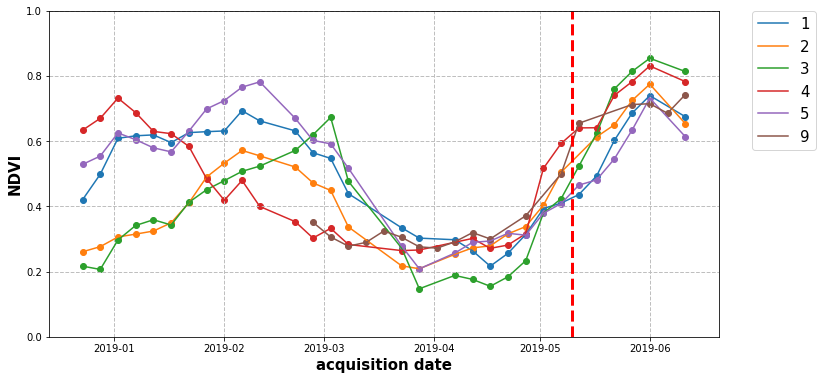

In [44]:

fig, ax = plt.subplots(figsize=[12,6])
labelsplot = []

data_plots = []
axes = plt.gca()
axes.set_ylim([0,1])
fields = [1,2,3,4,5,9]
count = 0
for i in np.unique(data_faridpur.id2):
    if np.logical_or(np.logical_not('shei' in i),'jinna_shei' in i):
        
        data_sub = data_faridpur.loc[data_faridpur.id2 == i]
        data_sub = data_sub.groupby(['date']).mean()
        acqdates = data_sub.index.values
        ndvi_data = data_sub.NDVI.values
        data_sub['field'] = i
        if 'jinna_shei' in i:
            acqdates =acqdates +  pd.Timedelta(65, unit='d')
            ndvi_data = ndvi_data[acqdates < np.datetime64('2019-06-15')]
            data_sub = data_sub.loc[acqdates < np.datetime64('2019-06-15')]
            
            acqdates = acqdates[acqdates < np.datetime64('2019-06-15')]
        
        data_sub = data_sub.loc[acqdates > np.datetime64('2019-05-10')]

        ndvi_smoothed = savgol_filter(ndvi_data, 5, 3)
        ax.plot(acqdates,ndvi_smoothed)
        ax.scatter(acqdates,ndvi_smoothed )
        ax.grid(True, lw=1, ls='--', c='.75')
        labelsplot.append(str(fields[count]))
        data_plots.append(data_sub)
        count +=1
        
ax.axvline(pd.to_datetime('2019-05-10'), color='r', linestyle='--', lw=3)      
ax.legend(tuple(labelsplot), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
ax.set_xlabel("acquisition date", fontsize=15, fontweight='bold')
ax.set_ylabel("NDVI", fontsize=15, fontweight='bold')

In [19]:
data_pl = pd.concat(data_plots)

data_pl = pd.melt(data_pl, id_vars=['field'])
data_pl.to_csv("outputs/datafieldsfaridpur.csv")